In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.linalg import norm, svd

In [ ]:
def svd_solver(A,mask,t=None,delta=None,epsilon=1e-4,max_iterations=1000):
  Y=np.zeros_like(A)

  #initialize the step
  if not t:
    t=5*np.sum(A.shape)/2
  if not delta:
    delta=1.2*np.prod(A.shape)/np.sum(mask)

  for i in range(max_iterations):
    #SVD decomposition
    U,S,V=np.linalg.svd(Y,full_matrices=False)
    #soft-thresholding operator
    S=np.maximum(S-t,0)
    #singular value shrinkage
    X=np.linalg.multi_dot([U,np.diag(S),V])
    #interation of Y
    Y+=delta*mask*(A-X)
    #error calculation
    error=np.linalg.norm(mask*(X-A))/np.linalg.norm(mask*A)
    if error<epsilon:
      break
  return X

In [ ]:
from google.colab import files
data = files.upload()

Saving movie rating.csv to movie rating.csv


In [ ]:
data=pd.read_csv('movie rating.csv')
data0=data.iloc[:,1:]
matrix_1=data0.values
matrix_1=matrix_1.astype(float)

In [ ]:
shape=matrix_1.shape
mask_1=np.zeros(shape)
for i in range(0,shape[0]):
  for j in range(0,shape[1]):
    if matrix_1[i,j]>0:
      mask_1[i,j]=1

In [ ]:
result_1=svd_solver(matrix_1,mask_1)
print(np.linalg.norm(result_1,'nuc'))

49.803324829219775


In [ ]:
def new_rating(original,result,user):
  ratings=[]
  for i in range(original.shape[1]):
    r=original[user,i]
    if r==0:
      ratings.append((i,result[user,i]))
  return sorted(ratings,key=lambda x:x[1],reverse=True)

In [ ]:
A=new_rating(matrix_1,result_1,5)
print(A)
listA=[]
for each in A:
  listA.append(each[0])
print(listA)

[(12, 2.7988455938660435), (20, 2.7568038396917163), (6, 2.5533488559785034), (11, 2.4181458496009465), (9, 2.3934548913249722), (19, 2.3692632040764545), (2, 2.249469695024611), (5, 2.140758951063685), (18, 1.8893884719935368), (21, 1.8109155787737543), (10, 1.6753395237818438), (15, 1.5052826176483534), (14, 1.3141876471079168), (1, 1.096624674115633), (22, 1.080294077330592), (13, 1.0466318171339426)]
[12, 20, 6, 11, 9, 19, 2, 5, 18, 21, 10, 15, 14, 1, 22, 13]


In [ ]:
c=0
KKK=data0.columns.values.tolist()
for each in KKK:
  print(c,each)
  c+=1


0 lmjr
1 ccnn
2 ldz
3 lsjr
4 tmm
5 cqsl
6 amypj
7 hdlq
8 bwbj
9 rsnzdxx
10 lsn
11 ht
12 fsx
13 hxqj
14 mrwt
15 dlr
16 tsddz
17 ylzj
18 ydm
19 hxldnyy
20 dmkj
21 hkdg
22 yt


In [ ]:
def inexact_augmented_lagrange_multiplier(X, lmbda=.01, tol=1e-4,
                                          maxiter=1000, verbose=True):
    """
    Inexact Augmented Lagrange Multiplier
    """
    Y = X
    norm_two = norm(Y.ravel(), 2)
    norm_inf = norm(Y.ravel(), np.inf) / lmbda
    dual_norm = np.max([norm_two, norm_inf])
    Y = Y / dual_norm
    A = np.zeros(Y.shape)
    E = np.zeros(Y.shape)
    dnorm = norm(X, 'fro')
    mu = 1.25 / norm_two
    rho = 1.5
    sv = 10.
    n = Y.shape[0]
    itr = 0
    while True:
        Eraw = X - A + (1 / mu) * Y
        Eupdate = np.maximum(Eraw - lmbda / mu, 0) + np.minimum(Eraw + lmbda / mu, 0)
        U, S, V = svd(X - Eupdate + (1 / mu) * Y, full_matrices=False)
        svp = (S > 1 / mu).shape[0]
        if svp < sv:
            sv = np.min([svp + 1, n])
        else:
            sv = np.min([svp + round(.05 * n), n])
        Aupdate = np.dot(np.dot(U[:, :svp], np.diag(S[:svp] - 1 / mu)), V[:svp, :])
        A = Aupdate
        E = Eupdate
        Z = X - A - E
        Y = Y + mu * Z
        mu = np.min([mu * rho, mu * 1e7])
        itr += 1
        if ((norm(Z, 'fro') / dnorm) < tol) or (itr >= maxiter):
            break
    if verbose:
        print("Finished at iteration %d" % (itr))  
    return A, E

In [ ]:
A, E = inexact_augmented_lagrange_multiplier(matrix_1)
print(np.linalg.norm(A,'nuc'))

Finished at iteration 29
0.004888742165184243


In [ ]:
B=new_rating(matrix_1,A,5)
print(B)
listB=[]
for each in B:
  listB.append(each[0])
print(listB)

[(10, 5.950336251550837e-05), (19, 5.809782779260938e-05), (1, 3.267676099406184e-05), (12, 9.759944023806139e-06), (21, 8.10541560066799e-06), (15, 7.699075185712738e-06), (13, 7.40289728346519e-06), (9, 5.250047299608268e-06), (5, -1.2472182943033763e-06), (18, -5.294525351062344e-06), (2, -9.517685845455233e-06), (6, -2.8849692153836647e-05), (11, -3.4318398201865096e-05), (14, -3.7598988883350614e-05), (20, -6.418925262461074e-05), (22, -8.552365424921415e-05)]
[10, 19, 1, 12, 21, 15, 13, 9, 5, 18, 2, 6, 11, 14, 20, 22]


In [ ]:
from google.colab import files
data2 = files.upload()

Saving yyy.csv to yyy.csv


In [ ]:
data2=pd.read_csv('yyy.csv',header=None)
result3=np.array(data2)
C=new_rating(matrix_1,result3,5)
print(C)
listC=[]
for each in C:
  listC.append(each[0])
print(listC)

[(20, 1.0297), (12, 0.74842), (2, 0.73618), (1, 0.57342), (11, 0.11032), (22, -0.027697), (13, -0.086354), (5, -0.13486), (19, -0.20042), (14, -0.20869), (10, -0.26654), (9, -0.30273), (6, -0.37356), (18, -0.44108), (21, -0.5303), (15, -0.90704)]
[20, 12, 2, 1, 11, 22, 13, 5, 19, 14, 10, 9, 6, 18, 21, 15]


In [ ]:
print(listA,listB,listC)

[12, 20, 6, 11, 9, 19, 2, 5, 18, 21, 10, 15, 14, 1, 22, 13] [5, 20, 6, 12, 18, 13, 21, 1, 14, 10, 11, 19, 15, 9, 2, 22] [20, 12, 2, 1, 11, 22, 13, 5, 19, 14, 10, 9, 6, 18, 21, 15]


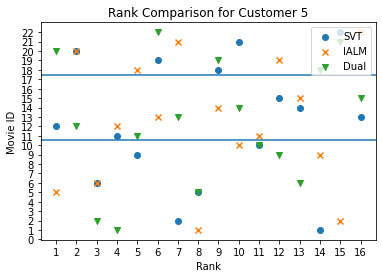

In [ ]:
listX=range(1,len(listA)+1)
plt.scatter(listX,listA,label='SVT')
plt.scatter(listX,listB,marker='x',label='IALM')
plt.scatter(listX,listC,marker='v',label='Dual')
plt.legend(loc='upper right')
plt.title('Rank Comparison for Customer 5')
plt.xticks(listX)
plt.yticks(range(0,23))
plt.xlabel('Rank')
plt.ylabel('Movie ID')
plt.axhline(y=10.5, xmin=0, xmax=14)
plt.axhline(y=17.5, xmin=0, xmax=14)
plt.show()
